<h1> Chicago Car Crashes

<html>
    <body>
        <h2>Overview</h2>
        <p>This project analyzes car crashes in Chicago to create a classification model that is able to predict injury in
           event of a car crash.The information found could be useful for insurance agencies that have
           to deal with claims. A common issue insurance companies face is fraud, and therefore an AI that can either confirm
           or deny will help with that and lead to more genuine insurance cases.
        </p>
    </body>
</html>           

<html>
<body>
    <h2> Business Understanding </h2>
    <p> Insurance companies commonly use statistics in determining insurance rates. When there are greater claims than expected there arises a natural suspicion of fraud. The goal of this project is to
        create an algorithm that uses data collected from Chicago, in order to determine whether an injury took place
        in event of a car crash. This AI with its ability should expect to mirror the true population of injuries of whichever
        area it is predicting. Therefore in this example of Chicago, if the AI is accurate, the distribution of injury or
        no injury should emulate the true population of individuals who were truly injured in a car crash.
    </p>
    <img src="https://www.moneycrashers.com/wp-content/uploads/2016/09/chicago-illinois-traffic-810x455.jpg" 
         alt="Chicago Illinois Traffic" width="600" height="180">
    <p> After establishing an optimal AI, I will market the findings to car insurance company Progressive. They will be able
        to better establish insurance rates by finding the true rate of injury which will lower fraud and therefore unneeded payouts.
    </p>
    </body>
    </html>

<html>
    <body>
        <h3> Organizing and Cleaning Data</h3>
    </body>
    </html>

In [1]:
#Import relevant modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
#load and inspect data
crashes = pd.read_csv('Data/crashes.csv')
crashes.head()

,crash_record_id,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,...,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
0,e8b2fd3210597f2691080ea0c2f405c96ad30158a83d08...,NaN,NaN,2022-03-23T04:06:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,...,NaN,NaN,NaN,NaN,4,4,3,41.943187,-87.688302,POINT (-87.688302020702 41.943187373182)
1,9da07f301572a382a78963f4c2455dfaae7cceb63d714e...,NaN,NaN,2022-03-23T03:00:00.000,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,NaN,NaN,NaN,NaN,3,4,3,41.954069,-87.701295,POINT (-87.701294680241 41.954068957935)
2,3c298987dca2de7a678ebe471d2f0cb655a1137f43f18e...,NaN,N,2022-03-23T02:05:00.000,35,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,NaN,NaN,NaN,NaN,2,4,3,41.968268,-87.734057,POINT (-87.734057247598 41.968267647901)
3,f29db08fa944374ed45f16623e7386bccf00f62ca10245...,NaN,NaN,2022-03-23T01:34:00.000,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,NaN,NaN,NaN,NaN,1,4,3,41.898645,-87.726330,POINT (-87.726330031203 41.898644517516)
4,2d96cfb6adc6e1abdf73b0c95e958ebd5bfc06eaeafd43...,NaN,NaN,2022-03-23T00:55:00.000,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,...,0.0,0.0,3.0,0.0,0,4,3,41.772031,-87.673860,POINT (-87.673859538093 41.772030915088)


In [3]:
#Checking Nulls and Dtypes
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_record_id                1000 non-null   object 
 1   rd_no                          0 non-null      float64
 2   crash_date_est_i               63 non-null     object 
 3   crash_date                     1000 non-null   object 
 4   posted_speed_limit             1000 non-null   int64  
 5   traffic_control_device         1000 non-null   object 
 6   device_condition               1000 non-null   object 
 7   weather_condition              1000 non-null   object 
 8   lighting_condition             1000 non-null   object 
 9   first_crash_type               1000 non-null   object 
 10  trafficway_type                1000 non-null   object 
 11  lane_cnt                       0 non-null      float64
 12  alignment                      1000 non-null   ob

In [4]:
#Load and inspect data
people = pd.read_csv('Data/crashes_people.csv')
people.head()

,person_id,person_type,crash_record_id,rd_no,vehicle_id,crash_date,seat_no,city,state,zipcode,...,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result_value,cell_phone_use
0,O1303531,DRIVER,2d96cfb6adc6e1abdf73b0c95e958ebd5bfc06eaeafd43...,NaN,1237935.0,2022-03-23T00:55:00.000,NaN,CHICAGO,IL,60620,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O1303532,DRIVER,2d96cfb6adc6e1abdf73b0c95e958ebd5bfc06eaeafd43...,NaN,1237941.0,2022-03-23T00:55:00.000,NaN,CHICAGO,IL,60620,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,P290164,PASSENGER,2d96cfb6adc6e1abdf73b0c95e958ebd5bfc06eaeafd43...,NaN,1237935.0,2022-03-23T00:55:00.000,3.0,NaN,IL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,O1303513,DRIVER,878940067d5f0d9f0ff7c43ead0e1cdfb6ee710066e62a...,NaN,1237922.0,2022-03-23T00:28:00.000,NaN,CHICAGO,IL,60659,...,NaN,FOLLOWED TOO CLOSELY,NOT OBSCURED,EMOTIONAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O1303514,DRIVER,878940067d5f0d9f0ff7c43ead0e1cdfb6ee710066e62a...,NaN,1237924.0,2022-03-23T00:28:00.000,NaN,CHICAGO,IL,60626,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [5]:
#Checking Nulls and Dtypes
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_id              1000 non-null   object 
 1   person_type            1000 non-null   object 
 2   crash_record_id        1000 non-null   object 
 3   rd_no                  0 non-null      float64
 4   vehicle_id             990 non-null    float64
 5   crash_date             1000 non-null   object 
 6   seat_no                200 non-null    float64
 7   city                   703 non-null    object 
 8   state                  720 non-null    object 
 9   zipcode                649 non-null    object 
 10  sex                    986 non-null    object 
 11  age                    670 non-null    float64
 12  drivers_license_state  574 non-null    object 
 13  drivers_license_class  466 non-null    object 
 14  safety_equipment       997 non-null    object 
 15  airba

In [6]:
#Load and inspect data
vehicles = pd.read_csv('Data/crashes_vehicles.csv')
vehicles.head()

,crash_unit_id,crash_record_id,rd_no,crash_date,unit_no,unit_type,num_passengers,vehicle_id,cmrc_veh_i,make,...,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class
0,1303531,2d96cfb6adc6e1abdf73b0c95e958ebd5bfc06eaeafd43...,NaN,2022-03-23T00:55:00.000,1,DRIVER,1.0,1237935.0,NaN,DODGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1303532,2d96cfb6adc6e1abdf73b0c95e958ebd5bfc06eaeafd43...,NaN,2022-03-23T00:55:00.000,2,DRIVER,NaN,1237941.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1303513,878940067d5f0d9f0ff7c43ead0e1cdfb6ee710066e62a...,NaN,2022-03-23T00:28:00.000,1,DRIVER,NaN,1237922.0,NaN,LEXUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1303514,878940067d5f0d9f0ff7c43ead0e1cdfb6ee710066e62a...,NaN,2022-03-23T00:28:00.000,2,DRIVER,NaN,1237924.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1303524,42bf48bb68e454d2968128d766a51fae5dc100a5ad41f5...,NaN,2022-03-23T00:20:00.000,1,DRIVER,1.0,1237929.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Checking Nulls and Dtypes
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   crash_unit_id             1000 non-null   int64  
 1   crash_record_id           1000 non-null   object 
 2   rd_no                     0 non-null      float64
 3   crash_date                1000 non-null   object 
 4   unit_no                   1000 non-null   int64  
 5   unit_type                 999 non-null    object 
 6   num_passengers            148 non-null    float64
 7   vehicle_id                986 non-null    float64
 8   cmrc_veh_i                39 non-null     object 
 9   make                      986 non-null    object 
 10  model                     986 non-null    object 
 11  lic_plate_state           883 non-null    object 
 12  vehicle_year              825 non-null    float64
 13  vehicle_defect            986 non-null    object 
 14  vehicle_t

In [8]:
#Combining DataFrames
crash = crashes.merge(people).merge(vehicles)
crash.tail()

,crash_record_id,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,...,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class
997,f888e91548ec65ddd939c3c2e726c0b385e3dfdca00717...,NaN,NaN,2022-03-20T19:10:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,f888e91548ec65ddd939c3c2e726c0b385e3dfdca00717...,NaN,NaN,2022-03-20T19:10:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,f888e91548ec65ddd939c3c2e726c0b385e3dfdca00717...,NaN,NaN,2022-03-20T19:10:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,035ae7f173b6a4c66abc1ead5baba5afdc44f81a6abdc7...,NaN,NaN,2022-03-20T19:06:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,035ae7f173b6a4c66abc1ead5baba5afdc44f81a6abdc7...,NaN,NaN,2022-03-20T19:06:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Dropping any columns containing only Nulls
null_threshold = 1000
crash = crash.loc[:, (crash.isnull().sum() < null_threshold)]

#Dropping any duplicates
crash.drop_duplicates(inplace=True)
crash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1001
Columns: 121 entries, crash_record_id to mcs_out_of_service_i
dtypes: float64(20), int64(8), object(93)
memory usage: 955.0+ KB


In [10]:
to_drop = []
for col in crash.columns:
    if col.__contains__('injur'):
        to_drop.append(col)
        
to_drop

['most_severe_injury',
 'injuries_total',
 'injuries_fatal',
 'injuries_incapacitating',
 'injuries_non_incapacitating',
 'injuries_reported_not_evident',
 'injuries_no_indication',
 'injuries_unknown',
 'injury_classification']

In [11]:
#Dummying object variables
dummies = pd.get_dummies(crash.drop(to_drop, axis=1), drop_first=True, dtype=float)

"""
I made sure to exclude any injury classification column since injury is going to be my target 
variable. I do not want data leakage to influence my models.
"""
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1001
Columns: 3984 entries, posted_speed_limit to load_type_UNKNOWN
dtypes: float64(3976), int64(8)
memory usage: 30.5 MB


In [12]:
crasho = dummies

In [13]:
#Finding the raw values
crash.injury_classification.value_counts()

NO INDICATION OF INJURY     921
NONINCAPACITATING INJURY     43
REPORTED, NOT EVIDENT        29
INCAPACITATING INJURY         7
FATAL                         2
Name: injury_classification, dtype: int64

<html>
    <body>
        <p>Since I only care about events where injury took place, I am going to
            group all levels of injury together. <br>The number <b>1</b> will denote a crash where an injury
            took place. Likewise, a <b>0</b> will show when there was no injury.

In [14]:
#Making a list of cases where injury occured
injuries = []
for i in crash.injury_classification:
    if i == 'NO INDICATION OF INJURY':
        injuries.append(0)
    else:
        injuries.append(1)

#Assuring new list has original values
injuries = pd.DataFrame({'injured': injuries})
injuries.value_counts()

injured
0          921
1           81
dtype: int64

<html>
    <body>
    <p>The number of cases without injury kept is the same. Therefore, all cases where there was injury will still be encapsulated by the new column.</p>
    </body>
    </html>

In [15]:
#Adding target variable to usable data
crasho = pd.concat([crasho, injuries['injured']], axis=1)

In [109]:
#Dropping columns with mostly Null values
to_drop = crasho.loc[:, (crasho.isnull().sum() > 950)]
crasho = crasho.drop(to_drop, axis=1)
crasho = crasho.drop('crash_month', axis=1)
crasho.head()

,posted_speed_limit,street_no,beat_of_occurrence,num_units,crash_hour,crash_day_of_week,latitude,longitude,vehicle_id,seat_no,...,vehicle_config_TRACTOR/DOUBLES,vehicle_config_TRACTOR/SEMI-TRAILER,vehicle_config_TRUCK/TRACTOR,vehicle_config_TRUCK/TRAILER,cargo_body_type_FLATBED,cargo_body_type_GARBAGE/REFUSE,cargo_body_type_OTHER,cargo_body_type_VAN/ENCLOSED BOX,load_type_UNKNOWN,injured
0,30,6700,726,2.0,0,4,41.772031,-87.67386,1237935.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,30,6700,726,2.0,0,4,41.772031,-87.67386,1237935.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,30,6700,726,2.0,0,4,41.772031,-87.67386,1237941.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,30,2823,2413,2.0,0,4,41.993857,-87.70050,1237922.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,30,2823,2413,2.0,0,4,41.993857,-87.70050,1237924.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<html>
    <body>
        <p> The last effort in cleaning my data is assuring that there are no longer any Null values. The model assures that the model will run smoothly</p>
    </body>
    </html>
    

In [17]:
#Assure no Null values
for col in crasho.columns:
    median = crasho[col].median()
    crasho[col] = crasho[col].fillna(value=median)
    
crasho.isnull().sum().value_counts()

0    3981
dtype: int64

<html>
    <body>
        <h3> Exploring the Data </h3>
        <p> I am going to analyze when the data points were collected, how they fall into categories of interest (injured or not), and some other descriptive statistics for the data.
            <p>
    </body>
    </html>

In [18]:
#Finding the timespan of the collected data
earliest = crash.crash_date.min()
latest = crash.crash_date.max()

print(f"The data ranges from {earliest} to {latest}")

The data ranges from 2022-03-20T19:06:00.000 to 2022-03-23T00:55:00.000


<html>
    <body>
        <p> The data was collected between March 20th, 2022 at 7 pm and March 23rd, 2022 at 1 am.
            <br>
            <br>
            This means the data was collected very recently and provides an up to date inspection of
            the trend that I am trying to model.
        </p>
        </body>
    </html>

In [19]:
#Finding how many injuries there are in the data
injury = crasho['injured'].value_counts()
print(f"There are {len(injury)} different classifications of injury")
print(injury)
norm_injury = crasho['injured'].value_counts(normalize=True)
print(norm_injury)

There are 2 different classifications of injury
0    921
1     81
Name: injured, dtype: int64
0    0.919162
1    0.080838
Name: injured, dtype: float64


In [20]:
#Finding rate of purely negative diagnoses
percent = (norm_injury.max()*100).round(2)
print(f"An AI that predicted strictly no injuries would be correct {percent}% of the time")

An AI that predicted strictly no injuries would be correct 91.92% of the time


<html>
    <body>
        <p> The main issue of a model that predicted only negatively would be <b>false negatives.</b>
            <br>
            <br>
            A false negative in this scenario would be much worse than a false positive since an untreated injury would possibly lead to <b>death</b> whereas a false positive would only mean a waste of an ambulance trip. That makes the accuracy of the model more inperative, since the 8% of people it could falsely deem as okay could wound up dead.</p>
    </body>
    </html>

In [21]:
#defining analyzation function
def analyze(m):
    
    leest = []
    desc = m.describe()
    mode = m.mode()
    counts = m.value_counts()
    leest.append([desc, mode, counts])
    
    return print(leest)

In [22]:
#Settings columns to analyze
to_anal = [crash['num_passengers'], crash['age']]

for i in to_anal:
    analyze(i)

[[count    328.000000
mean       1.902439
std        1.652427
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: num_passengers, dtype: float64, 0    1.0
dtype: float64, 1.0    194
2.0     65
3.0     46
9.0     10
6.0      7
5.0      6
Name: num_passengers, dtype: int64]]
[[count    672.000000
mean      36.831845
std       16.486638
min        0.000000
25%       25.000000
50%       34.000000
75%       48.000000
max       90.000000
Name: age, dtype: float64, 0    28.0
dtype: float64, 28.0    28
18.0    24
27.0    22
32.0    20
31.0    18
        ..
10.0     1
74.0     1
90.0     1
89.0     1
2.0      1
Name: age, Length: 79, dtype: int64]]


<html>
    <body>
        <hr>
        <p> The reported majority of car crashes were involving 1 driver per car. This could imply that the findings
            will mostly apply on an individual basis. There are enough situations reported however that skew the mean
            to the right. I believe there would need to be more data reported on the number of passengers to give more
            insight into the topic since onlt roughly a third of passengers were counted out of the data.
            <br>
            <br>
            For age, the most commonly reported number was 28, yet the mean was higher, indicating skew. A potential 
            answer to this trend could be the fact that there are less older people driving. In addition, the fact that
            many crashes were to sole drivers, that would exclude younger people from the car crashes involving older
            people who were driving alone.
        </p>
    </body>
    </html>

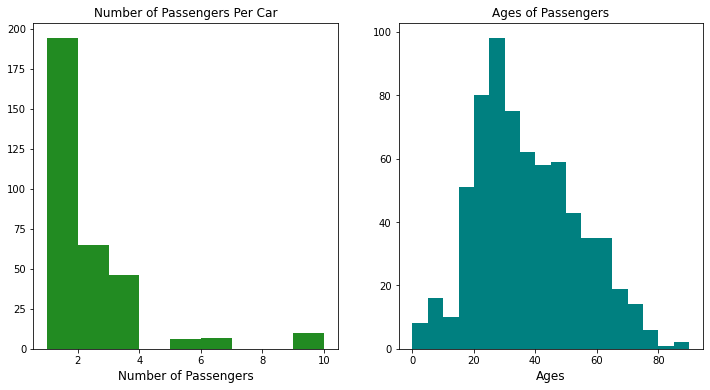

In [68]:
#setting figure size
fig, (ax1, ax2) = plt.subplots(figsize=(12, 6),
                      nrows=1,
                      ncols=2)

#Plotting hist for passengers
ax1.hist(crash['num_passengers'],
        bins=range(1, 11),
        color='forestgreen'
        )

#Setting labels
ax1.set_title('Number of Passengers Per Car', size=12)
ax1.set_xlabel('Number of Passengers', size=12)

#Plotting hist for ages
ax2.hist(crash['age'],
        bins='auto',
        color='teal'
        )

#Setting labels
ax2.set_title('Ages of Passengers', size=12)
ax2.set_xlabel('Ages', size=12)

#Show plots
plt.show()

<html>
    <body>
        <h3> Machine Learning </h3>
        <p> I am going to start by building a <b>Logistic Regression model</b>. <br> <br> The first step will be defining X and y, the <u> predictors </u> and the <span style="border: 1px solid black" >target </span>. 
        </p>
    </body>
    </html>
        

In [267]:
X = crasho.drop(['injured'], axis=1)
y = crasho['injured']

<html>
    <body>
        <p> After assigning X and y, I will <b> Normalize </b> the predictors. <br> Doing this will make sure that the variables are between 0 and 1. This levels the playing field, so that no variable weighs more than another.</p>
    </body>
    </html>
        

In [268]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

#Normalizing with MinMaxScaler
mm.fit_transform(X)

array([[0.5       , 0.51534733, 0.25381758, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.51534733, 0.25381758, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.51534733, 0.25381758, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.5343488 , 0.99092035, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.24609585, 0.41766405, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.24609585, 0.41766405, ..., 0.        , 0.        ,
        0.        ]])

<html>
    <body>
        <p> Thirdly, I will conduct a <b> Train-test split </b> </p>
    </body>
    </html>

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

<html>
    <body>
        <p> With the data split into a training and test set. I can <b>instantiate</b> an instance of a logistic model, then <b>fit</b> that model to the training set.</p>
    </body>
    </html>

In [270]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='lbfgs')

<html>
<body>
        <h3> Model Evaluation </h3>
        <hr>
        <p> In order to evaluate how well the each model performs, I will be looking at their Recall scores.
            <br>
            <br>
            I will be doing this since the Recall metric is a measurement of how well the model finds the postive samples.
            That is is especially important in this case since I am trying to find when injury truly occured, and an instance
            where a false negative is ignored is ultimately worse than a false positive.
        </p>
    </body>
    </html>

<html>
    <hr>
    <body>
        <p> I will now undergo the creation of a Pipeline that will result in a <b>RandomForestClassifier</b>.
            <br>
            <br>
            Pipelines are useful since I can streamline common Data Science 
            practices like parameter tuning. It will also produce
            multiple models that will collaborate to provide accurate predictions through "wisdom of the crowd." Lastly, it makes scoring easy since I am able to specify which metric I would like
            grade my models on that I can later call.
        </p>
    </body>
    </html>

<html>
    <body>
        <p style="font-size: 2vw">
            The Pipeline model will be:
        </p>
        <ul>
            <li> Estimated with the DecisionTreeClassifier</li>
            <li> Tuned with varying max depths</li>
            <li> Tuned with varying minimum samples</li>
        </ul>

In [300]:
X = crasho.drop(['injured'], axis=1)
y = crasho['injured']

In [301]:
mm.fit_transform(X)

array([[0.5       , 0.51534733, 0.25381758, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.51534733, 0.25381758, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.51534733, 0.25381758, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.5343488 , 0.99092035, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.24609585, 0.41766405, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.24609585, 0.41766405, ..., 0.        , 0.        ,
        0.        ]])

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.25)

In [303]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False)

In [361]:
RunThrice('Logistic', logreg)

KeyboardInterrupt: 

In [304]:
pipe = Pipeline([('tree', DecisionTreeClassifier(random_state=23))])

grid = [{'tree__max_depth': [3, 5, 7],
        'tree__min_samples_split': [5, 10]}]

gridsearch = GridSearchCV(estimator = pipe,
                         param_grid = grid,
                         scoring = 'accuracy',
                         cv = 5)

gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tree',
                                        DecisionTreeClassifier(random_state=23))]),
             param_grid=[{'tree__max_depth': [3, 5, 7],
                          'tree__min_samples_split': [5, 10]}],
             scoring='accuracy')

In [305]:
from xgboost import XGBClassifier

In [306]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [307]:
param_grid = {
    'learning_rate': [0.1],
    'max_depth': [3,5],
    'min_child_weight': [1, 2],
    'subsample': [0.5],
    'n_estimators': [75],
}

In [308]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 3
min_child_weight: 2
n_estimators: 75
subsample: 0.5


In [347]:
smote = SMOTE()

def ModelSummary(n):
    
    train_pred = n.predict(X_train)
    test_pred = n.predict(X_test)
    
    X_resampled, y_resampled = smote.fit_sample(X_train, y_train)
    resized = n.fit(X_resampled, y_resampled)
    
    resized_train_pred = resized.predict(X_resampled)
    resized_test_pred = resized.predict(X_test)
    
    train_recall = recall_score(log_y_train, train_pred)
    test_recall = recall_score(log_y_test, test_pred)
    resized_train_recall = recall_score(y_resampled, resized_train_pred)
    resized_test_recall = recall_score(log_y_test, resized_test_pred)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    resized_train_acc = accuracy_score(y_resampled, resized_train_pred)
    resized_test_acc = accuracy_score(y_test, resized_test_pred)
    
    Summary = {'Train_Rec': train_recall, 'Test_rec': test_recall,
               'Train_Rec_Res': resized_train_recall, 'Test_Rec_Res': resized_test_recall,
               'Train_Acc': train_acc, 'Test_Acc': test_acc,
               'Train_Acc_Res': resized_train_acc, 'Test_Acc_Res': resized_test_acc}
    
    
    return Summary

In [310]:
ModelSummary('Logistic', logreg)

,Train_Rec,Test_rec,Train_Rec_Res,Test_Rec_Res,Train_Acc,Test_Acc,Train_Acc_Res,Test_Acc_Res
Logistic,0.0,0.0,0.580692,0.333333,0.924101,0.904382,0.652017,0.685259


In [322]:
ModelSummary('Gridsearch', gridsearch)

,Train_Rec,Test_rec,Train_Rec_Res,Test_Rec_Res,Train_Acc,Test_Acc,Train_Acc_Res,Test_Acc_Res
Gridsearch,0.824561,0.458333,0.988473,0.458333,0.960053,0.896414,0.976225,0.900398


In [364]:
n = 0
while n < 3:
    if n == 0:
        summ = pd.DataFrame(ModelSummary(clf), index=[1])
    elif n == 1:
        summ1 = pd.DataFrame(ModelSummary(clf), index=[1])
    elif n == 2:
        summ2 = pd.DataFrame(ModelSummary(clf), index=[1])
    
    n += 1
    if n == 3:
        summ3 = pd.concat([summ, summ1, summ2])
    
    average = summ3.mean()
average

Train_Rec        1.000000
Test_rec         0.416667
Train_Rec_Res    1.000000
Test_Rec_Res     0.402778
Train_Acc        1.000000
Test_Acc         0.932271
Train_Acc_Res    1.000000
Test_Acc_Res     0.932271
dtype: float64

In [360]:
RunThrice('XGB', clf)

KeyboardInterrupt: 

In [314]:
ModelSummary('Grid_XGB', grid_clf)

,Train_Rec,Test_rec,Train_Rec_Res,Test_Rec_Res,Train_Acc,Test_Acc,Train_Acc_Res,Test_Acc_Res
Grid_XGB,0.877193,0.458333,0.997118,0.458333,0.985353,0.928287,0.997118,0.932271


<html>

<html>
    <body>
        <p> After running the models, I have concluded that the <b> Gridsearch model refit with SMOTE</b> best encapsulates the goal of the project. The goal being to take this data and create a model for predicting if injury occurs in event of a car crash.
            <br>
            <br>
            I chose it since it performed scored well in terms of accuracy on both the training and test slightly less on the test data, but it seemed to be less overfitting to the training data. The same can be said about the <b>XGBClassifier</b> model except that the chosen model performed better on the test data.
            <br>
            <br>
            I also chose the <b>Gridsearch model</b> since it is more flexible through its ensemble method, and it ran practically as fast as the <b>Logistic model</b>. The <b>XGBClassifier</b> was also considerably slower than its Gridsearch counterpart.
        </p>
    </body>
    </html>

<html>
    <body>
        <h2> Gridsearch Model Application to the Business Problem</h2>
        <p> This model can be used to help deter fraud without negelecting individuals who may need help.
            <br>
            <br>
            Since this model can accurately distinguish between car crashes with and without injury, it can double check claims of injury. When using this, an insurance company like Progressive will be able to better calculate rates by reducing false claims. Due to the fact that the model is accurate without creating too many false negatives, Progressive will help people who claim to be injured, and who truly are when confirmed through the model.
            